In [537]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [538]:
data = pd.read_csv('/content/train-2.csv')

In [539]:
data.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35


# Data Type Correction

It is observed that the data-type of certain columns are not exactly the right data-type suitable for those corresponding columns:

The data type of columns Departure_Time and Arrival_Time are as 'object' but should be of 'datetime'.

In [540]:
data.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [541]:
data['Departure_Time'] = pd.to_datetime(data['Departure_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

In [542]:
data.dtypes

Flight_ID                     object
Airline                       object
Departure_City                object
Arrival_City                  object
Distance                     float64
Departure_Time        datetime64[ns]
Arrival_Time          datetime64[ns]
Duration                     float64
Aircraft_Type                 object
Number_of_Stops                int64
Day_of_Week                   object
Month_of_Travel               object
Holiday_Season                object
Demand                        object
Weather_Conditions            object
Passenger_Count                int64
Promotion_Type                object
Fuel_Price                   float64
Flight_Price                 float64
dtype: object

In [543]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Flight_ID           45000 non-null  object        
 1   Airline             41427 non-null  object        
 2   Departure_City      44660 non-null  object        
 3   Arrival_City        44814 non-null  object        
 4   Distance            44909 non-null  float64       
 5   Departure_Time      45000 non-null  datetime64[ns]
 6   Arrival_Time        45000 non-null  datetime64[ns]
 7   Duration            45000 non-null  float64       
 8   Aircraft_Type       44957 non-null  object        
 9   Number_of_Stops     45000 non-null  int64         
 10  Day_of_Week         44775 non-null  object        
 11  Month_of_Travel     44733 non-null  object        
 12  Holiday_Season      45000 non-null  object        
 13  Demand              44683 non-null  object    

In [544]:
data.shape

(45000, 19)

# Checking and Handling Missing Values

In [545]:
data.isnull().sum()

Flight_ID                0
Airline               3573
Departure_City         340
Arrival_City           186
Distance                91
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type           43
Number_of_Stops          0
Day_of_Week            225
Month_of_Travel        267
Holiday_Season           0
Demand                 317
Weather_Conditions     302
Passenger_Count          0
Promotion_Type         403
Fuel_Price              90
Flight_Price             0
dtype: int64

In [546]:
data['Airline'].fillna(data['Airline'].mode()[0], inplace=True)
#data['Fuel_Price'].fillna(data['Distance'].mean(),inplace=True


# Fill missing values in categorical columns with the mode
categorical_columns = ['Departure_City', 'Arrival_City', 'Aircraft_Type', 'Day_of_Week', 'Month_of_Travel', 'Demand', 'Weather_Conditions', 'Promotion_Type']
for column in categorical_columns:
   data[column].fillna(data[column].mode()[0], inplace=True)

# Fill missing values in numerical columns with the mean
numerical_columns = ['Fuel_Price', 'Distance']
for column in numerical_columns:
    data[column].fillna(data[column].mean(), inplace=True)




In [547]:
data.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [548]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
Flight_ID,0.0
Day_of_Week,0.0
Fuel_Price,0.0
Promotion_Type,0.0
Passenger_Count,0.0
Weather_Conditions,0.0
Demand,0.0
Holiday_Season,0.0
Month_of_Travel,0.0
Number_of_Stops,0.0


In [549]:
data['Day_of_Week'].value_counts()

Sunday       6697
Saturday     6418
Friday       6414
Monday       6407
Wednesday    6406
Tuesday      6336
Thursday     6322
Name: Day_of_Week, dtype: int64

In [550]:
data['Promotion_Type'].value_counts()

Special Offer    15299
Discount         14889
None             14812
Name: Promotion_Type, dtype: int64

In [551]:
data['Weather_Conditions'].value_counts()

Cloudy    11711
Snow      11148
Rain      11093
Clear     11048
Name: Weather_Conditions, dtype: int64

In [552]:
data['Demand'].value_counts()

Low       29263
Medium     8954
High       6783
Name: Demand, dtype: int64

In [553]:
data['Holiday_Season'].value_counts()

Spring    9036
None      9020
Fall      9010
Summer    8970
Winter    8964
Name: Holiday_Season, dtype: int64

In [554]:
data['Month_of_Travel'].value_counts()

January      4110
October      3812
April        3776
July         3755
November     3749
September    3731
March        3727
August       3712
December     3700
June         3672
May          3658
February     3598
Name: Month_of_Travel, dtype: int64

In [555]:
data['Number_of_Stops'].value_counts()

1    22287
0    20157
3     2556
Name: Number_of_Stops, dtype: int64

In [556]:
data['Airline'].value_counts()

Airline A    17436
Airline C    13809
Airline B    13755
Name: Airline, dtype: int64

In [557]:
data['Aircraft_Type'].value_counts()

Airbus A320    9154
Boeing 777     9059
Boeing 787     8952
Airbus A380    8943
Boeing 737     8892
Name: Aircraft_Type, dtype: int64

In [558]:
data['Arrival_City'].value_counts()

North Michael       235
Port Michael         47
Lake Michael         42
New Michael          35
Michaelmouth         35
                   ... 
Summerland            1
North Lindafurt       1
West Waynetown        1
North Keithmouth      1
Gabrielville          1
Name: Arrival_City, Length: 23479, dtype: int64

In [559]:
data['Departure_City'].value_counts()

Port Michael         389
West Michael          47
North Michael         42
South Michael         40
North David           39
                    ... 
New Jordanchester      1
North Morgan           1
North Mindy            1
Mcmillanberg           1
East Patriciafurt      1
Name: Departure_City, Length: 23187, dtype: int64

In [560]:
data.drop_duplicates()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,Port Michael,Greenshire,8286.0,2023-11-04 08:23:00,2023-11-04 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-04 20:28:00,2023-11-04 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-04 11:30:00,2023-11-04 15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,F4,Airline A,Blakefort,Crosbyberg,3145.0,2023-11-04 20:24:00,2023-11-04 01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-04 21:59:00,2023-11-04 06:04:00,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,2023-11-04 21:49:00,2023-11-04 03:31:00,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,2023-11-04 22:50:00,2023-11-04 11:48:00,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2023-11-04 02:33:00,2023-11-04 11:21:00,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,2023-11-04 13:25:00,2023-11-04 19:37:00,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


# Check Outlier

In [561]:
data.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2592.222795,3.292880,0.750578,72.372980,0.201535,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3233.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5482.238727,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7720.000000,10.650000,1.000000,238.000000,1.020000,679.692500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


In [562]:
q3 = data['Distance'].quantile(0.75)
q1 = data['Distance'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(14450.5, -3497.5)

In [563]:
q3 = data['Duration'].quantile(0.75)
q1 = data['Duration'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(19.065, -3.375000000000001)

In [564]:
q3 = data['Number_of_Stops'].quantile(0.75)
q1 = data['Number_of_Stops'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(2.5, -1.5)

In [565]:
q3 = data['Passenger_Count'].quantile(0.75)
q1 = data['Passenger_Count'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(427.0, -77.0)

In [566]:
q3 = data['Fuel_Price'].quantile(0.75)
q1 = data['Fuel_Price'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(1.53, 0.17000000000000004)

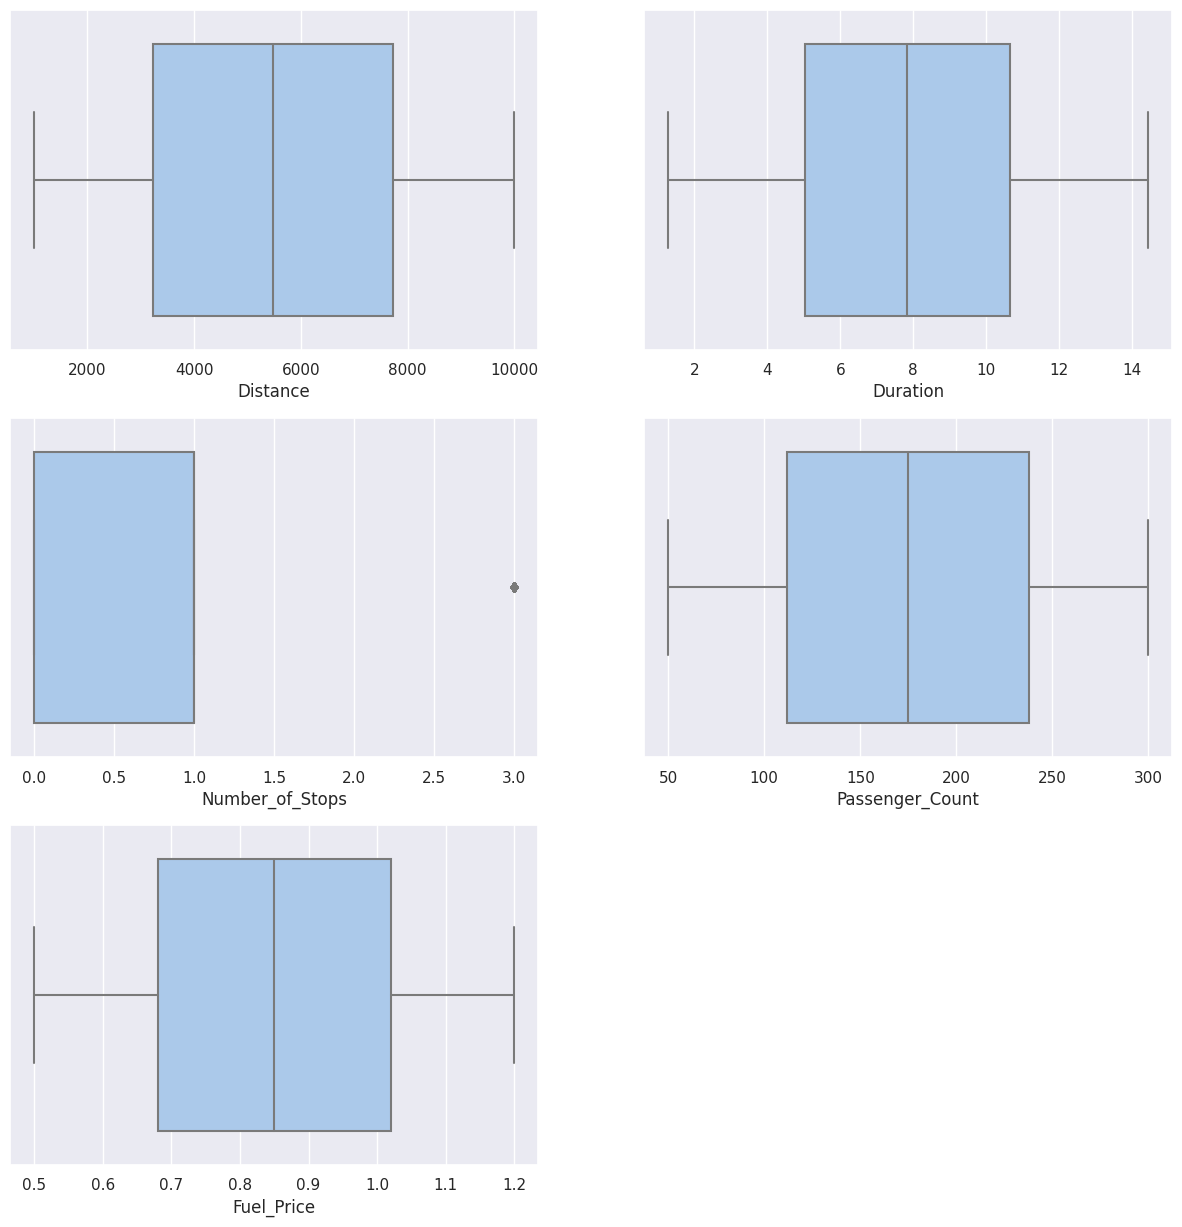

In [567]:
n = 1
cols =["Distance","Duration","Number_of_Stops","Passenger_Count","Fuel_Price"]
plt.figure(figsize=(15,15))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = data[i])
            plt.xlabel(i)

In [568]:
data.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price', 'Flight_Price'],
      dtype='object')

# Data Visualization

# Univariate

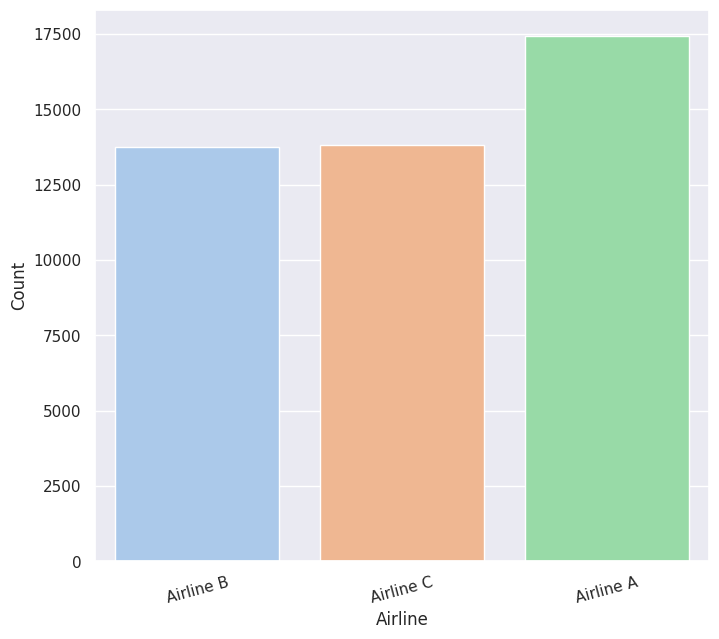

In [569]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn theme and palette
sns.set_theme(style='darkgrid', palette='pastel')

plt.figure(figsize=(20, 25))

plt.subplot(431)
sns.countplot(data=data, x='Airline', order=data['Airline'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Airline')
plt.ylabel('Count')


# Repeat the same pattern for other categorical columns

plt.tight_layout()
plt.show()


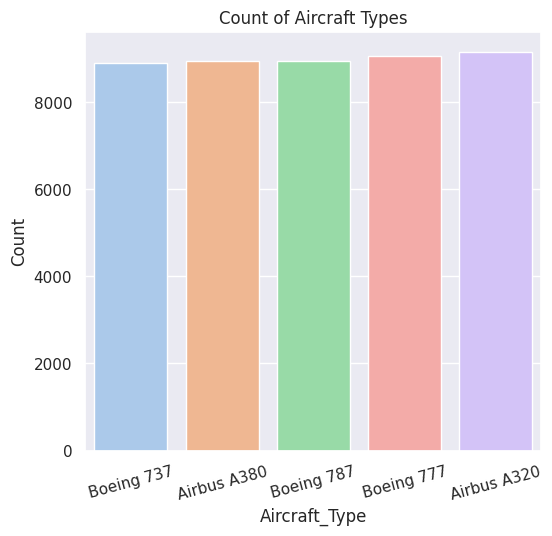

In [570]:
sns.set_theme(style='darkgrid', palette='pastel')
# Create a new figure with subplots
plt.figure(figsize=(20, 25))
# Create the first subplot
plt.subplot(431)
sns.countplot(data=data, x='Aircraft_Type', order=data['Aircraft_Type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Aircraft_Type')
plt.ylabel('Count')
plt.title('Count of Aircraft Types')  # Adjusted the title
plt.show()



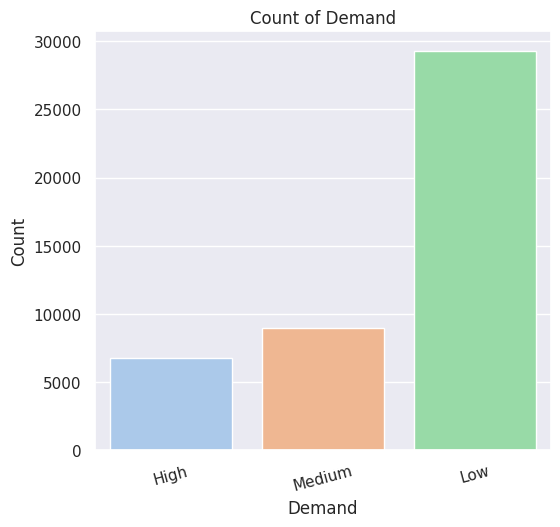

In [571]:
sns.set_theme(style='darkgrid', palette='pastel')
# Create a new figure with subplots
plt.figure(figsize=(20, 25))
# Create the first subplot
plt.subplot(431)
sns.countplot(data=data, x='Demand', order=data['Demand'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Demand')
plt.ylabel('Count')
plt.title('Count of Demand')  # Adjusted the title
plt.show()

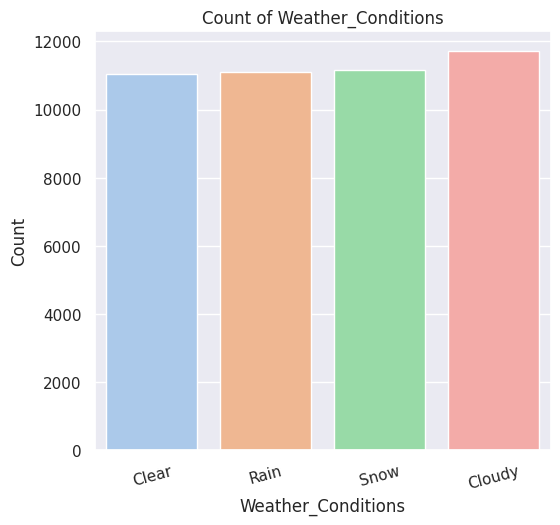

In [572]:
sns.set_theme(style='darkgrid', palette='pastel')
# Create a new figure with subplots
plt.figure(figsize=(20, 25))
# Create the first subplot
plt.subplot(431)
sns.countplot(data=data, x='Weather_Conditions', order=data['Weather_Conditions'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Weather_Conditions')
plt.ylabel('Count')
plt.title('Count of Weather_Conditions')  # Adjusted the title
plt.show()

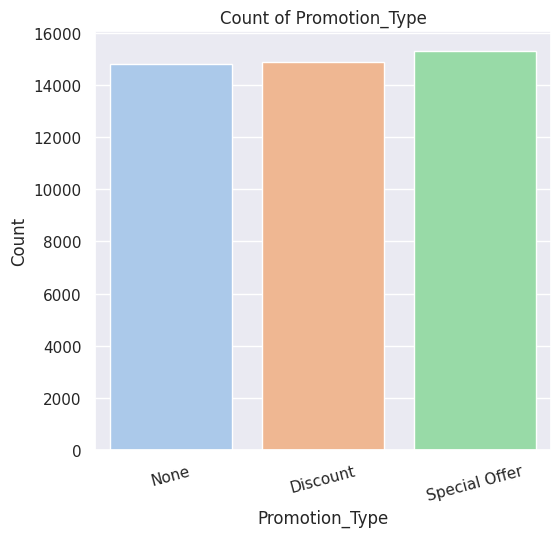

In [573]:
sns.set_theme(style='darkgrid', palette='pastel')
# Create a new figure with subplots
plt.figure(figsize=(20, 25))
# Create the first subplot
plt.subplot(431)
sns.countplot(data=data, x='Promotion_Type', order=data['Promotion_Type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Promotion_Type')
plt.ylabel('Count')
plt.title('Count of Promotion_Type')  # Adjusted the title
plt.show()

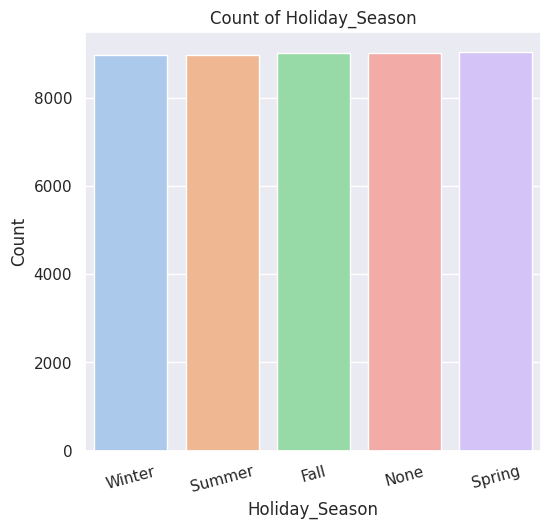

In [574]:
sns.set_theme(style='darkgrid', palette='pastel')
# Create a new figure with subplots
plt.figure(figsize=(20, 25))
# Create the first subplot
plt.subplot(431)
sns.countplot(data=data, x='Holiday_Season', order=data['Holiday_Season'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Holiday_Season')
plt.ylabel('Count')
plt.title('Count of Holiday_Season')  # Adjusted the title
plt.show()

# Bivariate

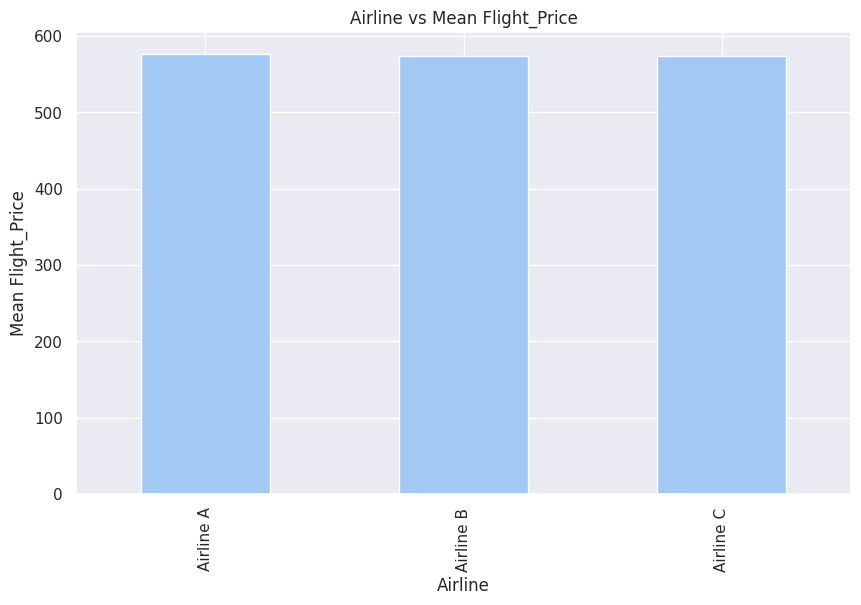

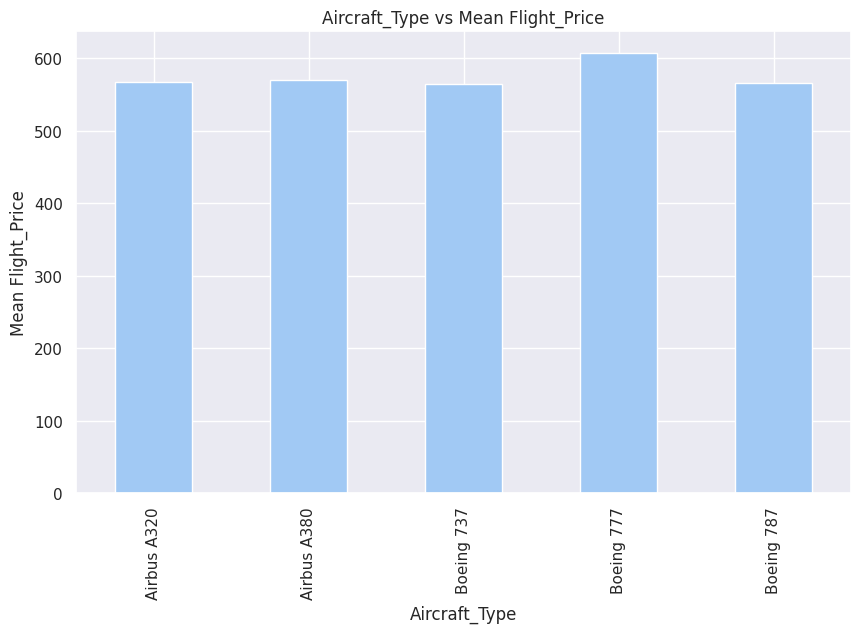

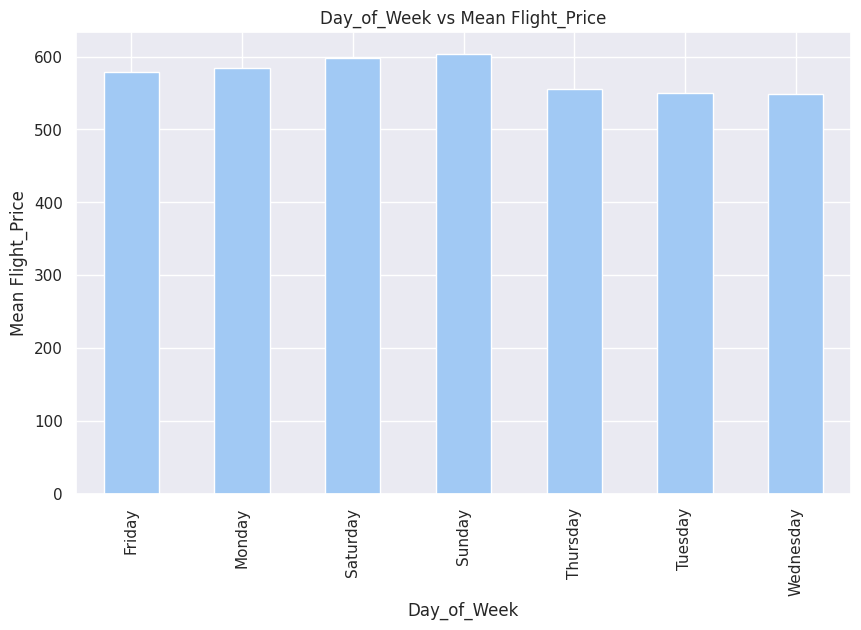

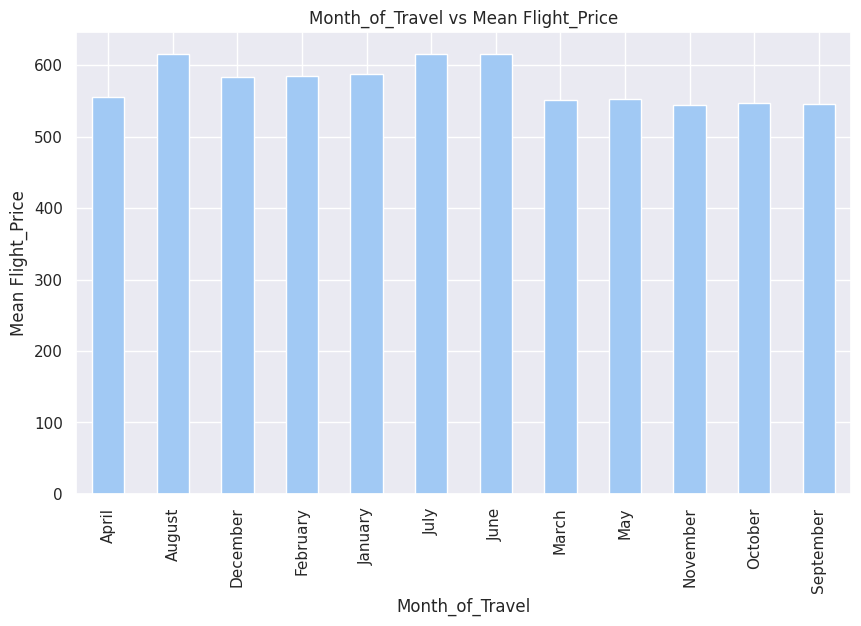

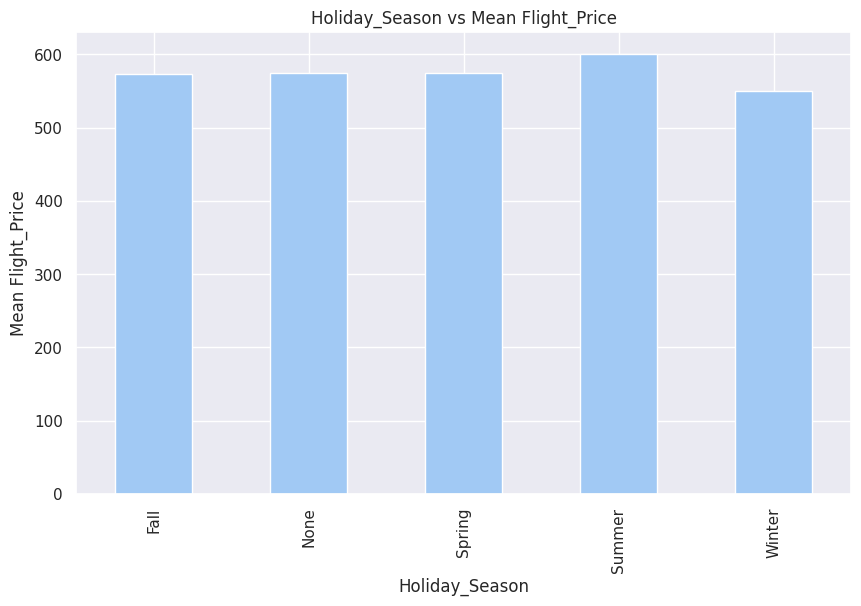

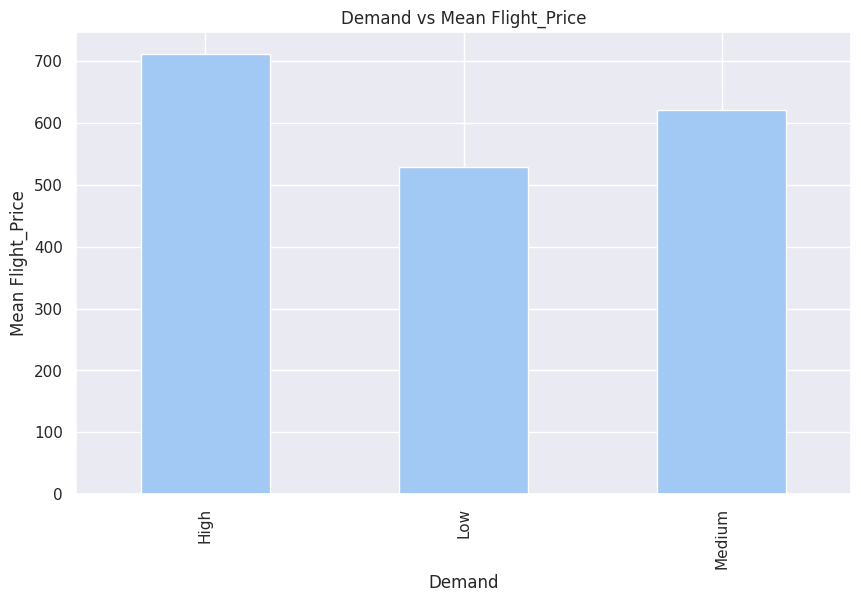

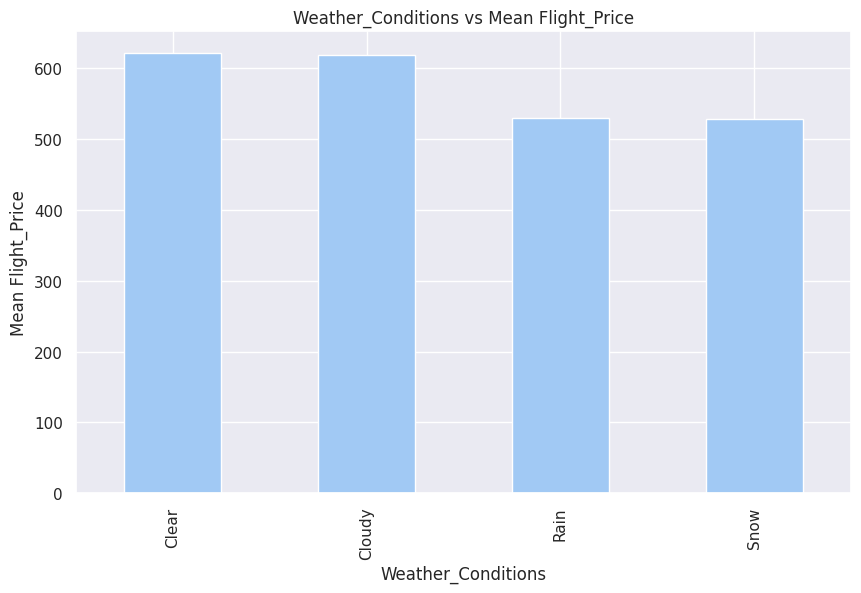

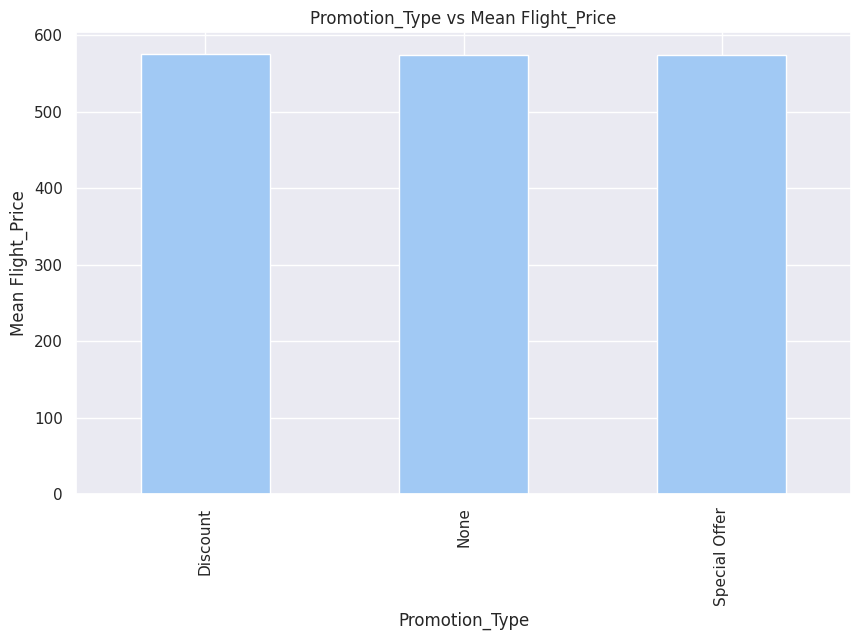

In [575]:

# List of features to plot
features = [
    'Airline',
    'Aircraft_Type',
    'Day_of_Week',
    'Month_of_Travel',
    'Holiday_Season',
    'Demand',
    'Weather_Conditions',
    'Promotion_Type'
]

# Plotting features against the target 'Flight_Price'
for feature in features:
    plt.figure(figsize=(10, 6))

    # Scatter plot for continuous features
    if data[feature].dtype != 'object':
        plt.scatter(data[feature], data['Flight_Price'], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel('Flight_Price')
        plt.title(f'{feature} vs Flight_Price')

    # Bar plot for categorical features
    else:
        data.groupby(feature)['Flight_Price'].mean().plot(kind='bar')
        plt.xlabel(feature)
        plt.ylabel('Mean Flight_Price')
        plt.title(f'{feature} vs Mean Flight_Price')

    plt.show()


In [576]:
data

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,Port Michael,Greenshire,8286.0,2023-11-04 08:23:00,2023-11-04 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-04 20:28:00,2023-11-04 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-04 11:30:00,2023-11-04 15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,F4,Airline A,Blakefort,Crosbyberg,3145.0,2023-11-04 20:24:00,2023-11-04 01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-04 21:59:00,2023-11-04 06:04:00,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,2023-11-04 21:49:00,2023-11-04 03:31:00,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,2023-11-04 22:50:00,2023-11-04 11:48:00,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2023-11-04 02:33:00,2023-11-04 11:21:00,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,2023-11-04 13:25:00,2023-11-04 19:37:00,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


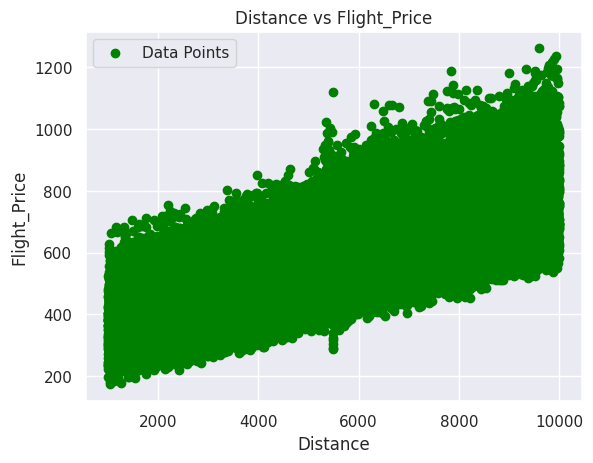

,Distance,Flight_Price
Distance,1.000000,0.762812
Flight_Price,0.762812,1.000000


In [577]:
import matplotlib.pyplot as plt

x = data['Distance']
y = data['Flight_Price']

plt.scatter(x, y, color='green', marker='o', label='Data Points')
plt.title('Distance vs Flight_Price')
plt.xlabel('Distance')
plt.ylabel('Flight_Price')
plt.legend()
plt.show()
data[['Distance','Flight_Price']].corr()

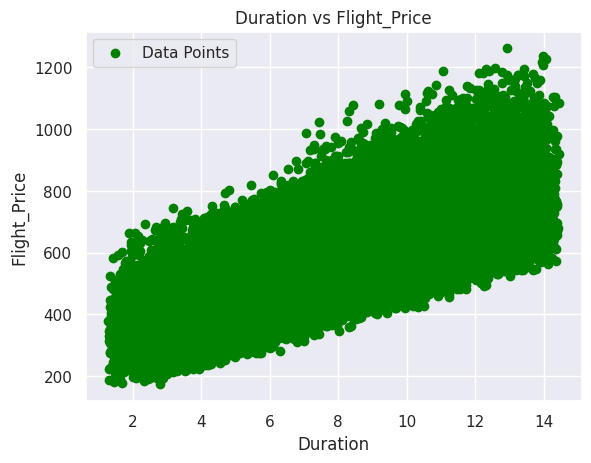

,Duration,Flight_Price
Duration,1.000000,0.759924
Flight_Price,0.759924,1.000000


In [578]:
x = data['Duration']
y = data['Flight_Price']

plt.scatter(x, y, color='green', marker='o', label='Data Points')
plt.title('Duration vs Flight_Price')
plt.xlabel('Duration')
plt.ylabel('Flight_Price')
plt.legend()
plt.show()
data[['Duration','Flight_Price']].corr()

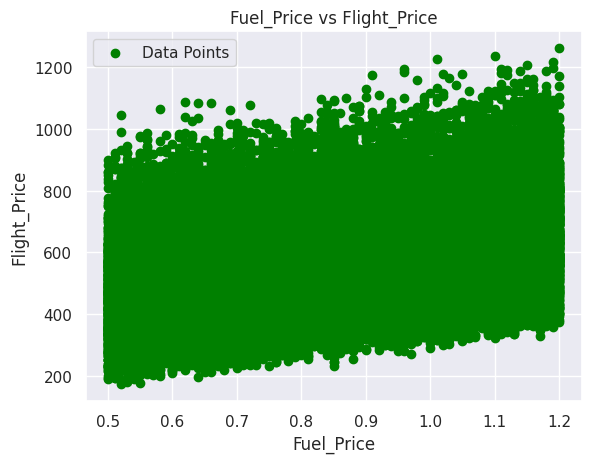

,Fuel_Price,Flight_Price
Fuel_Price,1.00000,0.34747
Flight_Price,0.34747,1.00000


In [579]:
x = data['Fuel_Price']
y = data['Flight_Price']

plt.scatter(x, y, color='green', marker='o', label='Data Points')
plt.title('Fuel_Price vs Flight_Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Flight_Price')
plt.legend()
plt.show()
data[['Fuel_Price','Flight_Price']].corr()

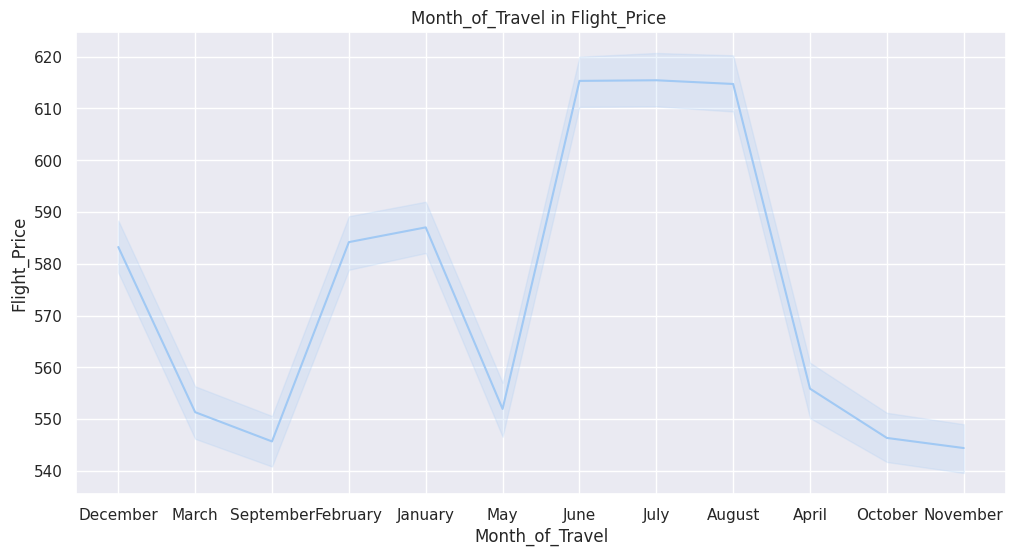

In [580]:
# Specify the data for the x and y axes
x = data['Month_of_Travel']
y = data['Flight_Price']

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create a line plot with Seaborn
sns.lineplot(x=x, y=y)

# Customize the plot
plt.title('Month_of_Travel in Flight_Price ')
plt.xlabel('Month_of_Travel')
plt.ylabel('Flight_Price')

# Show the plot
plt.show()



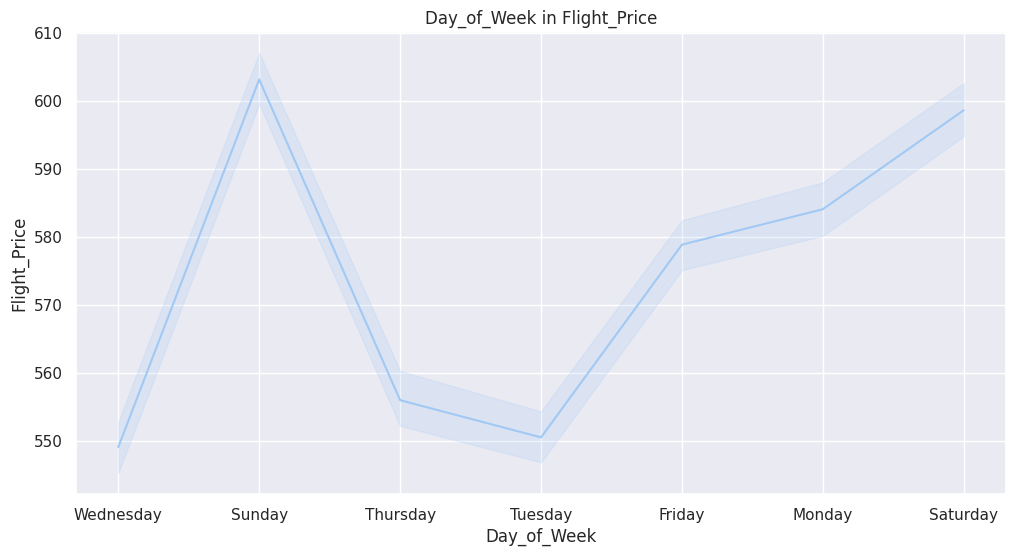

In [581]:
x = data['Day_of_Week']
y = data['Flight_Price']

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create a line plot with Seaborn
sns.lineplot(x=x, y=y)

# Customize the plot
plt.title('Day_of_Week in Flight_Price')
plt.xlabel('Day_of_Week')
plt.ylabel('Flight_Price')

# Show the plot
plt.show()


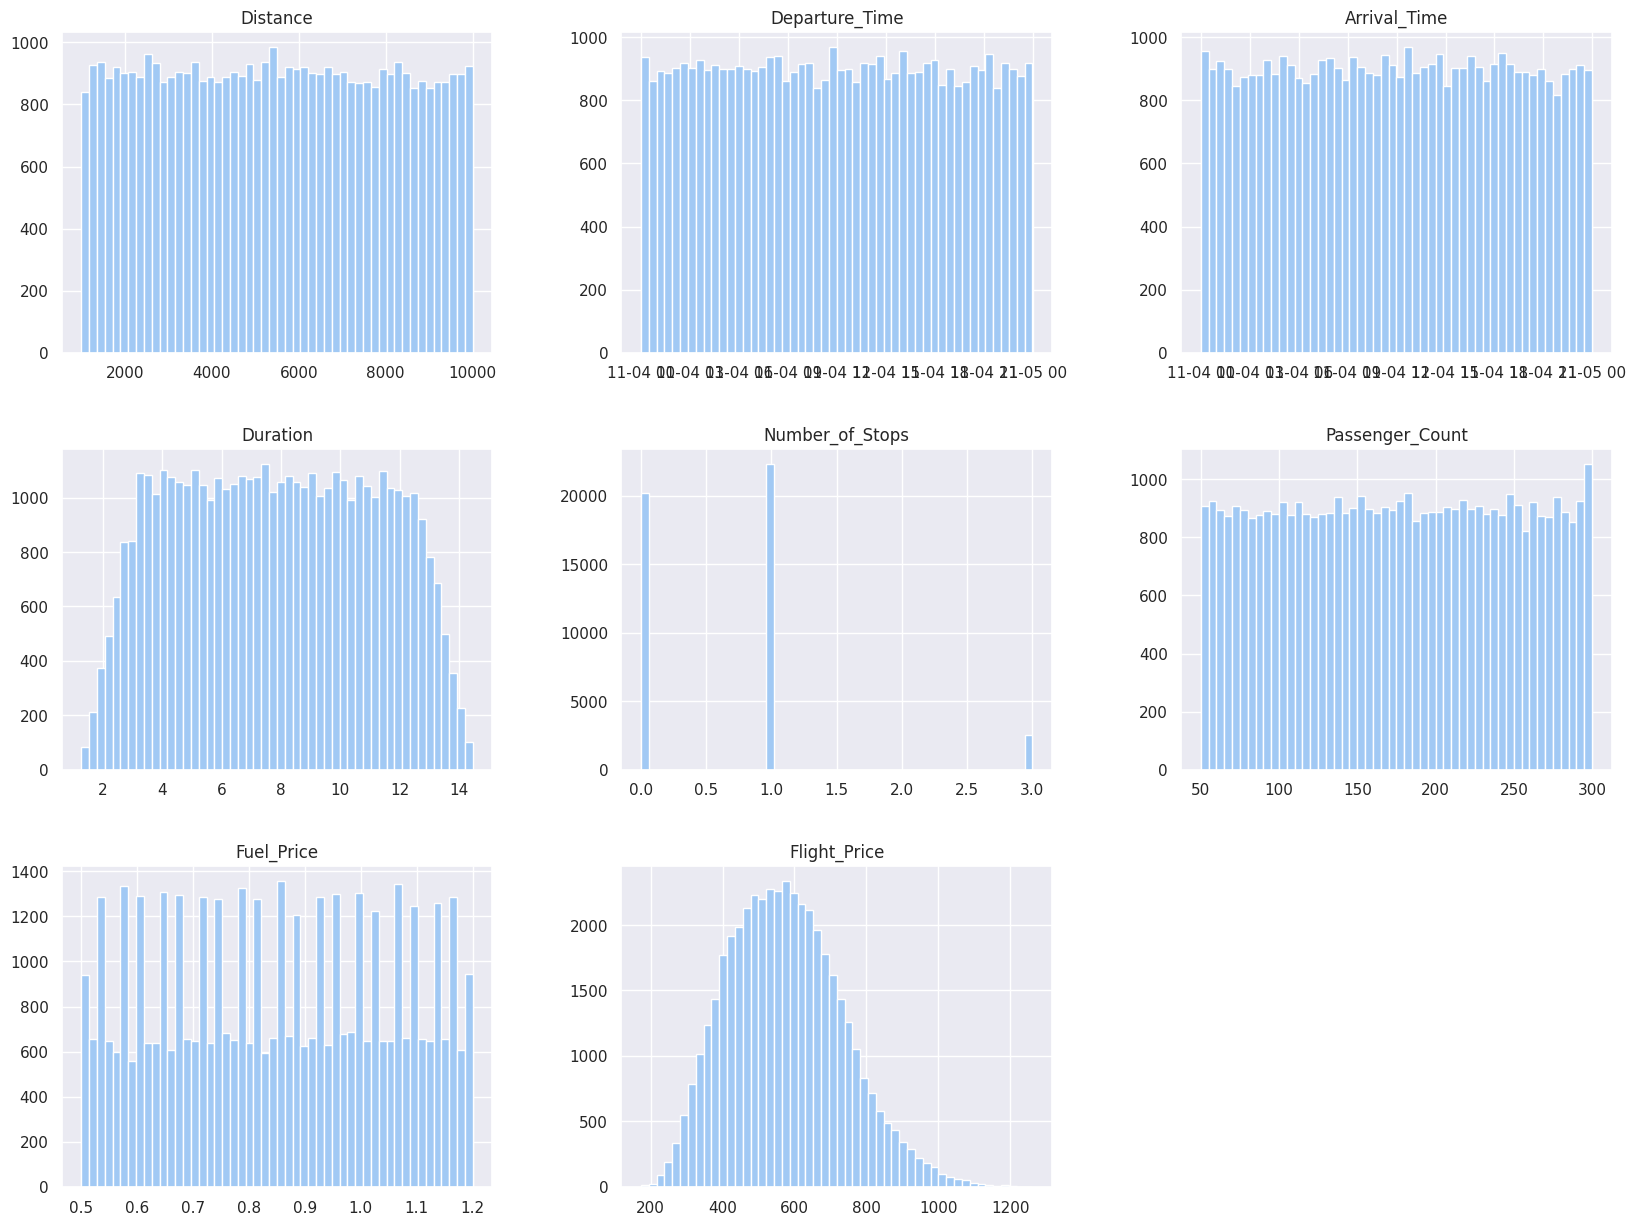

In [582]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [583]:
df=data.select_dtypes(["int64","float64"])

Distance
0.01089266353115304


<ipython-input-584-dc49c9bd102b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


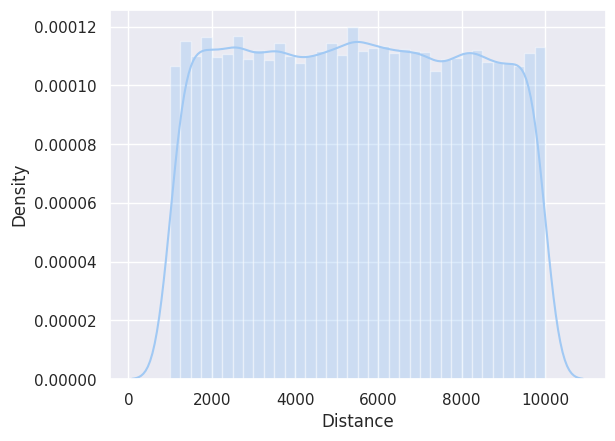

Duration
0.009100778592061624


<ipython-input-584-dc49c9bd102b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


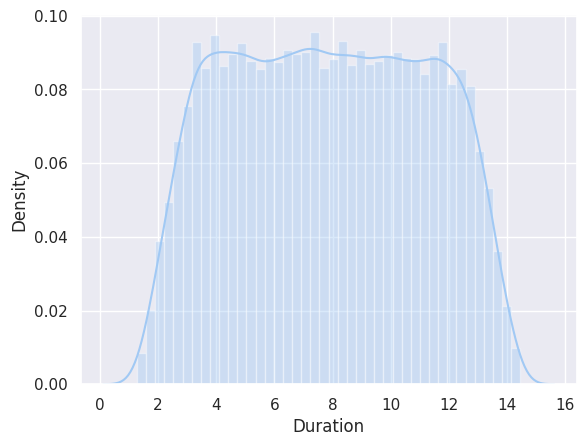

Number_of_Stops
1.439994682584519


<ipython-input-584-dc49c9bd102b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


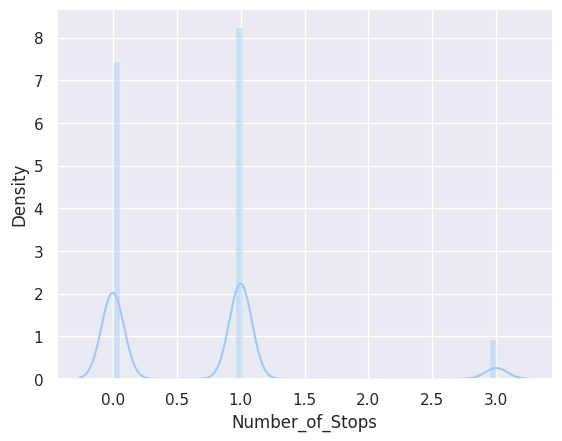

Passenger_Count
-0.0014985069925916434


<ipython-input-584-dc49c9bd102b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


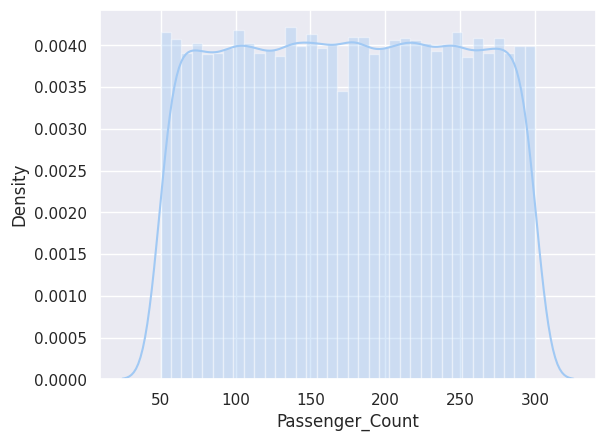

Fuel_Price
-0.0028449401511388118


<ipython-input-584-dc49c9bd102b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


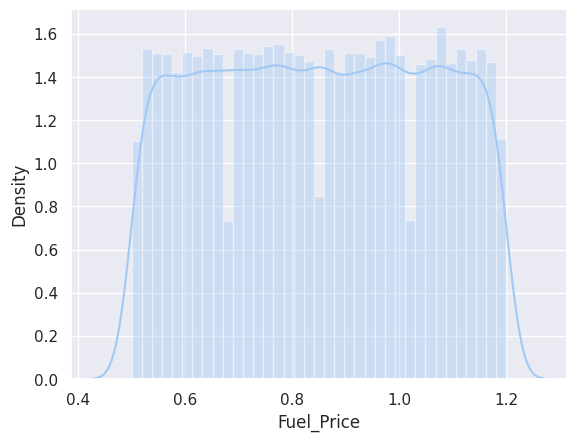

Flight_Price
0.39343856705550256


<ipython-input-584-dc49c9bd102b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


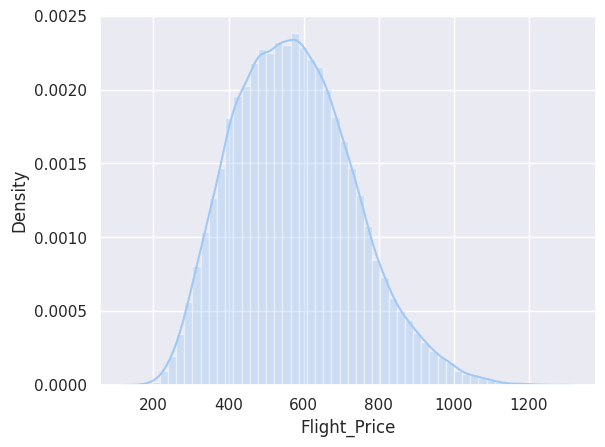

In [584]:
from scipy.stats import skew
for col in df:
  print(col)
  print(skew(df[col]))
  plt.figure()
  sns.distplot(df[col])
  plt.show()

In [585]:

#import numpy as np
#data['Distance_log'] = np.log(data['Distance'])
#sns.distplot(data['Distance_log'])
#plt.show()


# Feature engineering

In [586]:
#data['Speed'] = data['Distance'] / data['Duration']
#data['Average_Price_by_Route'] = data.groupby(['Departure_City', 'Arrival_City'])['Flight_Price'].transform('mean')
#data['Distance_type'] = pd.cut(data['Distance'], bins=[1000, 3000, 6000, 10000], labels=['Short', 'Medium', 'Long'])

In [587]:
data.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,Port Michael,Greenshire,8286.0,2023-11-04 08:23:00,2023-11-04 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-04 20:28:00,2023-11-04 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-04 11:30:00,2023-11-04 15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,F4,Airline A,Blakefort,Crosbyberg,3145.0,2023-11-04 20:24:00,2023-11-04 01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-04 21:59:00,2023-11-04 06:04:00,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35


In [588]:
data.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [589]:
#data['Distance_type'].fillna(data['Distance_type'].mode()[0], inplace=True)

In [590]:
data

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,Port Michael,Greenshire,8286.0,2023-11-04 08:23:00,2023-11-04 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-04 20:28:00,2023-11-04 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-04 11:30:00,2023-11-04 15:54:00,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,Special Offer,0.52,442.17
3,F4,Airline A,Blakefort,Crosbyberg,3145.0,2023-11-04 20:24:00,2023-11-04 01:21:00,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-04 21:59:00,2023-11-04 06:04:00,8.09,Boeing 737,1,Thursday,January,None,Low,Clear,181,None,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,2023-11-04 21:49:00,2023-11-04 03:31:00,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,2023-11-04 22:50:00,2023-11-04 11:48:00,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2023-11-04 02:33:00,2023-11-04 11:21:00,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,2023-11-04 13:25:00,2023-11-04 19:37:00,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


<ipython-input-591-2816e71c064b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


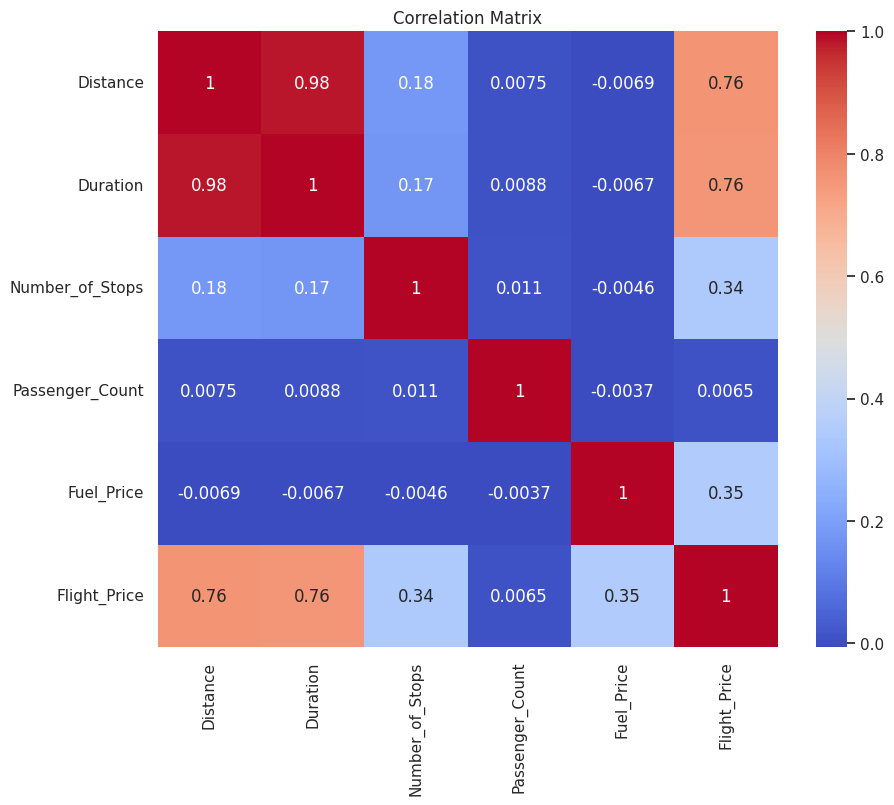

In [591]:
## Compute the correlation matrix
corr = data.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

# Encode

In [592]:

from sklearn.preprocessing import LabelEncoder
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,Port Michael,Greenshire,8286.0,2023-11-04 08:23:00,2023-11-04 20:19:00,11.94,Boeing 787,0,6,2,3,1,Rain,240,2,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-04 20:28:00,2023-11-04 01:45:00,5.29,Airbus A320,0,6,7,2,1,Rain,107,1,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,2023-11-04 11:30:00,2023-11-04 15:54:00,4.41,Boeing 787,1,3,11,3,0,Cloudy,131,2,0.52,442.17
3,F4,Airline A,Blakefort,Crosbyberg,3145.0,2023-11-04 20:24:00,2023-11-04 01:21:00,4.96,Boeing 787,0,3,3,0,1,Cloudy,170,0,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,2023-11-04 21:59:00,2023-11-04 06:04:00,8.09,Boeing 737,1,4,4,1,1,Clear,181,1,1.09,804.35


In [593]:
# Apply one-hot encoding
data = pd.get_dummies(data, columns = ['Airline'])

In [594]:
data = pd.get_dummies(data, columns = ['Aircraft_Type'])
data = pd.get_dummies(data, columns = ['Weather_Conditions'])


In [595]:
pip install category_encoders

In [596]:
# Perform leave-one-out encoding for card_type, card_number, and tid
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
data= looe_encoder.fit_transform(data, data['Flight_Price'])

In [597]:
pd.set_option('display.max_columns', 500)
data

,Flight_ID,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Airline_Airline A,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A320,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Clear,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,F1,565.452320,509.385000,8286.0,2023-11-04 08:23:00,2023-11-04 20:19:00,11.94,0,6,2,3,1,240,2,0.91,643.93,0,1,0,0,0,0,0,1,0,0,1,0
1,F2,574.606270,575.873333,2942.0,2023-11-04 20:28:00,2023-11-04 01:45:00,5.29,0,6,7,2,1,107,1,1.08,423.13,0,0,1,1,0,0,0,0,0,0,1,0
2,F3,574.606270,574.606270,2468.0,2023-11-04 11:30:00,2023-11-04 15:54:00,4.41,1,3,11,3,0,131,2,0.52,442.17,0,1,0,0,0,0,0,1,0,1,0,0
3,F4,516.070000,574.606270,3145.0,2023-11-04 20:24:00,2023-11-04 01:21:00,4.96,0,3,3,0,1,170,0,0.71,394.42,1,0,0,0,0,0,0,1,0,1,0,0
4,F5,529.299412,574.606270,5558.0,2023-11-04 21:59:00,2023-11-04 06:04:00,8.09,1,4,4,1,1,181,1,1.09,804.35,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,809.850000,768.770000,3884.0,2023-11-04 21:49:00,2023-11-04 03:31:00,5.70,1,3,8,0,1,263,0,0.69,417.18,0,1,0,0,0,0,0,1,1,0,0,0
44996,F44997,574.606270,574.606270,9191.0,2023-11-04 22:50:00,2023-11-04 11:48:00,12.97,1,0,2,0,1,168,0,0.74,687.03,1,0,0,1,0,0,0,0,0,0,0,1
44997,F44998,605.580000,448.145000,6757.0,2023-11-04 02:33:00,2023-11-04 11:21:00,8.81,1,6,10,0,1,244,2,0.83,547.39,0,0,1,0,0,0,1,0,0,0,0,1
44998,F44999,611.033333,574.606270,3587.0,2023-11-04 13:25:00,2023-11-04 19:37:00,6.21,0,2,6,1,2,121,2,0.60,487.67,0,1,0,0,0,1,0,0,0,1,0,0


In [598]:
# List of columns to drop
columns_to_drop = ['Flight_ID', 'Departure_Time', 'Arrival_Time']

# Dropping the specified columns and updating the DataFrame in-place
data.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
data.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Airline_Airline A,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A320,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Clear,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,565.452320,509.385000,8286.0,11.94,0,6,2,3,1,240,2,0.91,643.93,0,1,0,0,0,0,0,1,0,0,1,0
1,574.606270,575.873333,2942.0,5.29,0,6,7,2,1,107,1,1.08,423.13,0,0,1,1,0,0,0,0,0,0,1,0
2,574.606270,574.606270,2468.0,4.41,1,3,11,3,0,131,2,0.52,442.17,0,1,0,0,0,0,0,1,0,1,0,0
3,516.070000,574.606270,3145.0,4.96,0,3,3,0,1,170,0,0.71,394.42,1,0,0,0,0,0,0,1,0,1,0,0
4,529.299412,574.606270,5558.0,8.09,1,4,4,1,1,181,1,1.09,804.35,0,1,0,0,0,1,0,0,1,0,0,0


In [599]:
data.columns

Index(['Departure_City', 'Arrival_City', 'Distance', 'Duration',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Passenger_Count', 'Promotion_Type', 'Fuel_Price',
       'Flight_Price', 'Airline_Airline A', 'Airline_Airline B',
       'Airline_Airline C', 'Aircraft_Type_Airbus A320',
       'Aircraft_Type_Airbus A380', 'Aircraft_Type_Boeing 737',
       'Aircraft_Type_Boeing 777', 'Aircraft_Type_Boeing 787',
       'Weather_Conditions_Clear', 'Weather_Conditions_Cloudy',
       'Weather_Conditions_Rain', 'Weather_Conditions_Snow'],
      dtype='object')

# Splitting the data into input data and output data

In [600]:
X=data.drop(['Flight_Price'],axis=1)
y=data['Flight_Price']

In [601]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [602]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36000, 24) (9000, 24) (36000,) (9000,)


In [603]:
print(len(y_train))
print(len(y_test))

36000
9000


# Scaling

In [604]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 1.03104433e-02,  1.59076393e-03, -1.38337751e+00, ...,
         -5.93348038e-01, -5.72132626e-01, -5.74527651e-01],
        [ 1.03104433e-02, -3.20828809e-01, -1.56436550e+00, ...,
         -5.93348038e-01,  1.74784648e+00, -5.74527651e-01],
        [ 2.11858895e+00,  1.59076393e-03,  4.18767865e-01, ...,
         -5.93348038e-01,  1.74784648e+00, -5.74527651e-01],
        ...,
        [ 1.06993156e+00, -6.70831222e-01,  1.59789689e+00, ...,
         -5.93348038e-01,  1.74784648e+00, -5.74527651e-01],
        [ 1.03104433e-02,  1.59076393e-03, -1.44692609e-01, ...,
         -5.93348038e-01,  1.74784648e+00, -5.74527651e-01],
        [ 1.03104433e-02, -6.55680433e-01, -3.78275400e-01, ...,
         -5.93348038e-01,  1.74784648e+00, -5.74527651e-01]]),
 array([[ 1.03104433e-02, -1.70682569e-01, -3.91162811e-02, ...,
         -5.93348038e-01, -5.72132626e-01,  1.74056026e+00],
        [ 2.09191748e+00, -5.58530103e-02,  1.36070812e-01, ...,
         -5.93348038e-01,  1.74784648e

# Building Machine Learning Model

# Extreme Gradient Boosting Regression

**Choosing the best Learning Rate**

In [605]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.7892673239829721
Learning rate :  0.05 cross_val_score: 0.9878060280110786
Learning rate :  0.08 cross_val_score: 0.9908125301629253
Learning rate :  0.1 cross_val_score: 0.9910249951702245
Learning rate :  0.2 cross_val_score: 0.9904208481739317
Learning rate :  0.25 cross_val_score: 0.9898883947571858
Learning rate :  0.3 cross_val_score: 0.9895950149975679


In [606]:
cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.9910249951702245

In [607]:
print("The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.1 and Cross_val_score is: 0.9910249951702245


# Implementing Extreme Gradient Boosting Regression

In [608]:
# Initialize and train the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(learning_rate=0.1, n_estimators=100)
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [609]:
y_pred = xgb_regressor.predict(X_test)

In [610]:
y_pred

array([ 612.4412 ,  520.3413 ,  638.643  , ..., 1069.3391 ,  483.03226,
        614.19525], dtype=float32)

In [611]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,random_state = 42)
gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.9877580919988915
0.987674104948961


# R2 Score for  Extreme Gradient Boosting Regression

In [612]:
from sklearn.metrics import r2_score, mean_squared_error

In [613]:
R2_score_xgb=r2_score(y_test,y_pred)

In [614]:
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Extreme-Gradient Boosting Regression Model:  0.9917261984486485


# Rmse

In [615]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 14.80339004047805


In [616]:
#from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
#X_train = imputer.fit_transform(X_train)


# Feature_importances

In [617]:
xgb_regressor.feature_importances_

array([3.25597270e-04, 2.85042508e-04, 3.20026994e-01, 2.37170577e-01,
       7.03857914e-02, 2.36722808e-02, 2.33991519e-02, 3.97410651e-04,
       2.06922457e-01, 3.08503484e-04, 1.91512692e-04, 1.10342890e-01,
       1.70786807e-04, 1.17498705e-04, 1.27152205e-04, 1.08823850e-04,
       1.33104404e-04, 2.24657182e-04, 2.51466292e-03, 2.69160286e-04,
       7.70538056e-04, 7.47244747e-04, 7.54869601e-04, 6.33349933e-04],
      dtype=float32)

In [618]:
ftImp = list(zip(xgb_regressor.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
2,0.320027,Distance
3,0.237171,Duration
8,0.206922,Demand
11,0.110343,Fuel_Price
4,0.070386,Number_of_Stops
5,0.023672,Day_of_Week
6,0.023399,Month_of_Travel
18,0.002515,Aircraft_Type_Boeing 737
20,0.000771,Aircraft_Type_Boeing 787
22,0.000755,Weather_Conditions_Cloudy


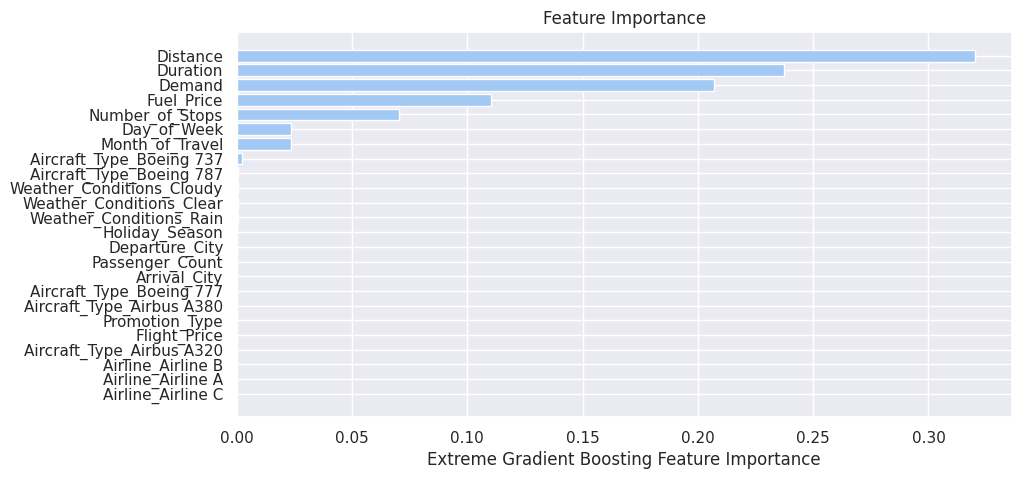

In [619]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()


In [665]:
test = pd.read_csv('/content/test.csv')

In [666]:
test.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,None,Low,Rain,223,None,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [667]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           5000 non-null   object 
 1   Airline             4573 non-null   object 
 2   Departure_City      4961 non-null   object 
 3   Arrival_City        4970 non-null   object 
 4   Distance            4991 non-null   float64
 5   Departure_Time      5000 non-null   object 
 6   Arrival_Time        5000 non-null   object 
 7   Duration            5000 non-null   float64
 8   Aircraft_Type       4992 non-null   object 
 9   Number_of_Stops     5000 non-null   int64  
 10  Day_of_Week         4975 non-null   object 
 11  Month_of_Travel     4966 non-null   object 
 12  Holiday_Season      5000 non-null   object 
 13  Demand              4966 non-null   object 
 14  Weather_Conditions  4951 non-null   object 
 15  Passenger_Count     5000 non-null   int64  
 16  Promot

In [668]:
test.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price'],
      dtype='object')

In [669]:
test.shape

(5000, 18)

In [670]:
test.isnull().sum()

Flight_ID               0
Airline               427
Departure_City         39
Arrival_City           30
Distance                9
Departure_Time          0
Arrival_Time            0
Duration                0
Aircraft_Type           8
Number_of_Stops         0
Day_of_Week            25
Month_of_Travel        34
Holiday_Season          0
Demand                 34
Weather_Conditions     49
Passenger_Count         0
Promotion_Type         49
Fuel_Price             10
dtype: int64

In [671]:
test.Airline.value_counts()

Airline A    1551
Airline C    1532
Airline B    1490
Name: Airline, dtype: int64

In [672]:
test['Airline'].fillna(test['Airline'].mode()[0], inplace=True)

In [673]:
test.Departure_City.value_counts()

Lake Michael        9
Smithmouth          7
Matthewmouth        7
Port Michael        7
Port Michelle       7
                   ..
New Mollyside       1
Christinaberg       1
South Taylorport    1
Hebertfort          1
Perrymouth          1
Name: Departure_City, Length: 4273, dtype: int64

In [674]:
test['Departure_City'].fillna(test['Departure_City'].mode()[0], inplace=True)

In [675]:
test.Arrival_City.value_counts()

Lake David          8
West Robert         7
North Michael       6
Jennifermouth       5
Port David          5
                   ..
Davidhaven          1
West Jenna          1
North Dennisview    1
East Robertport     1
West Deborah        1
Name: Arrival_City, Length: 4285, dtype: int64

In [676]:
test['Arrival_City'].fillna(test['Arrival_City'].mode()[0], inplace=True)

In [677]:
test.Distance.value_counts()

6855.0    4
6010.0    4
1161.0    4
8044.0    4
3803.0    4
         ..
9463.0    1
4611.0    1
1851.0    1
3761.0    1
2597.0    1
Name: Distance, Length: 3832, dtype: int64

In [678]:
test['Distance'].fillna(test['Distance'].median(), inplace=True)

In [679]:
test.Day_of_Week.value_counts()

Sunday       748
Tuesday      734
Saturday     726
Monday       708
Thursday     698
Friday       695
Wednesday    666
Name: Day_of_Week, dtype: int64

In [680]:
test['Day_of_Week'].fillna(test['Day_of_Week'].mode()[0], inplace=True)

In [681]:
test.Month_of_Travel.value_counts()

October      444
May          444
December     438
November     428
August       427
March        419
June         408
September    405
January      394
February     394
July         389
April        376
Name: Month_of_Travel, dtype: int64

In [682]:
test['Month_of_Travel'].fillna(test['Month_of_Travel'].mode()[0], inplace=True)

In [683]:
test.Demand.value_counts()

Low       3270
Medium    1006
High       690
Name: Demand, dtype: int64

In [684]:
test['Demand'].fillna(test['Demand'].mode()[0],inplace = True)

In [685]:
test.Weather_Conditions.value_counts()

Clear     1277
Rain      1245
Cloudy    1218
Snow      1211
Name: Weather_Conditions, dtype: int64

In [686]:
test['Weather_Conditions'].fillna(test['Weather_Conditions'].mode()[0] , inplace = True)

In [687]:
test.Promotion_Type.value_counts()


Special Offer    1666
Discount         1645
None             1640
Name: Promotion_Type, dtype: int64

In [688]:
test['Promotion_Type'].fillna(test['Promotion_Type'].mode()[0] , inplace = True)

In [689]:
test.Fuel_Price.value_counts()

0.98    88
0.68    85
1.17    85
0.69    84
0.92    83
        ..
0.75    59
0.85    57
0.95    52
0.50    46
1.20    43
Name: Fuel_Price, Length: 71, dtype: int64

In [690]:
test['Fuel_Price'].fillna(test['Fuel_Price'].median(), inplace=True)

In [691]:
test.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         8
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
dtype: int64

In [692]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type']

# Apply ordinal/Label encoding
label_encoder = LabelEncoder()
for col in ordinal_cols:
    test[col] = label_encoder.fit_transform(test[col])

In [693]:
# Define the columns to be encoded with one-hot encoding
#categorical_cols = ['Airline', 'Aircraft_Type', 'Weather_Conditions']
# Apply one-hot encoding
#test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

In [694]:
test = pd.get_dummies(test, columns = ['Airline'])
test = pd.get_dummies(test, columns = ['Aircraft_Type'])
test = pd.get_dummies(test, columns = ['Weather_Conditions'])

In [695]:
# Perform leave-one-out encoding for card_type, card_number, and tid
looe_encoder = LeaveOneOutEncoder(cols=['Departure_City', 'Arrival_City'])
test = looe_encoder.fit_transform(test, test['Distance'])

In [696]:
# List of columns to drop
columns_to_drop = ['Flight_ID', 'Departure_Time', 'Arrival_Time']

# Dropping the specified columns and updating the DataFrame in-place
test.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
test.head()

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Airline_Airline A,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A320,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Clear,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,4834.0000,5460.7206,3096.0,5.52,1,2,1,3,2,110,1,0.95,0,1,0,0,0,1,0,0,1,0,0,0
1,5460.7206,5460.7206,8760.0,11.80,1,4,0,1,0,295,0,1.05,1,0,0,0,1,0,0,0,1,0,0,0
2,5460.7206,5460.7206,6365.0,9.59,1,3,4,1,1,223,0,0.63,0,0,1,0,0,0,1,0,0,0,1,0
3,5460.7206,5460.7206,7836.0,10.21,0,4,7,1,1,223,1,0.88,1,0,0,0,1,0,0,0,0,0,1,0
4,5460.7206,5460.7206,1129.0,1.86,1,2,1,3,0,145,2,1.11,0,1,0,1,0,0,0,0,0,1,0,0


In [697]:
test

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Airline_Airline A,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A320,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Clear,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,4834.000000,5460.7206,3096.0,5.52,1,2,1,3,2,110,1,0.95,0,1,0,0,0,1,0,0,1,0,0,0
1,5460.720600,5460.7206,8760.0,11.80,1,4,0,1,0,295,0,1.05,1,0,0,0,1,0,0,0,1,0,0,0
2,5460.720600,5460.7206,6365.0,9.59,1,3,4,1,1,223,0,0.63,0,0,1,0,0,0,1,0,0,0,1,0
3,5460.720600,5460.7206,7836.0,10.21,0,4,7,1,1,223,1,0.88,1,0,0,0,1,0,0,0,0,0,1,0
4,5460.720600,5460.7206,1129.0,1.86,1,2,1,3,0,145,2,1.11,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8579.000000,5975.0000,9389.0,12.35,1,5,7,1,0,143,2,0.51,0,1,0,0,0,0,1,0,0,1,0,0
4996,5330.468085,5460.7206,7718.0,11.55,1,0,11,2,1,55,2,0.50,1,0,0,1,0,0,0,0,0,0,1,0
4997,5460.720600,5460.7206,2597.0,4.93,1,0,11,0,1,145,0,0.55,0,0,1,0,1,0,0,0,0,0,0,1
4998,5460.720600,5460.7206,4659.0,7.71,1,0,1,0,0,163,2,0.79,0,1,0,0,1,0,0,0,0,1,0,0


In [698]:
test

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Airline_Airline A,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A320,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Clear,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,4834.000000,5460.7206,3096.0,5.52,1,2,1,3,2,110,1,0.95,0,1,0,0,0,1,0,0,1,0,0,0
1,5460.720600,5460.7206,8760.0,11.80,1,4,0,1,0,295,0,1.05,1,0,0,0,1,0,0,0,1,0,0,0
2,5460.720600,5460.7206,6365.0,9.59,1,3,4,1,1,223,0,0.63,0,0,1,0,0,0,1,0,0,0,1,0
3,5460.720600,5460.7206,7836.0,10.21,0,4,7,1,1,223,1,0.88,1,0,0,0,1,0,0,0,0,0,1,0
4,5460.720600,5460.7206,1129.0,1.86,1,2,1,3,0,145,2,1.11,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8579.000000,5975.0000,9389.0,12.35,1,5,7,1,0,143,2,0.51,0,1,0,0,0,0,1,0,0,1,0,0
4996,5330.468085,5460.7206,7718.0,11.55,1,0,11,2,1,55,2,0.50,1,0,0,1,0,0,0,0,0,0,1,0
4997,5460.720600,5460.7206,2597.0,4.93,1,0,11,0,1,145,0,0.55,0,0,1,0,1,0,0,0,0,0,0,1
4998,5460.720600,5460.7206,4659.0,7.71,1,0,1,0,0,163,2,0.79,0,1,0,0,1,0,0,0,0,1,0,0


In [699]:
data

,Departure_City,Arrival_City,Distance,Duration,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price,Airline_Airline A,Airline_Airline B,Airline_Airline C,Aircraft_Type_Airbus A320,Aircraft_Type_Airbus A380,Aircraft_Type_Boeing 737,Aircraft_Type_Boeing 777,Aircraft_Type_Boeing 787,Weather_Conditions_Clear,Weather_Conditions_Cloudy,Weather_Conditions_Rain,Weather_Conditions_Snow
0,565.452320,509.385000,8286.0,11.94,0,6,2,3,1,240,2,0.91,643.93,0,1,0,0,0,0,0,1,0,0,1,0
1,574.606270,575.873333,2942.0,5.29,0,6,7,2,1,107,1,1.08,423.13,0,0,1,1,0,0,0,0,0,0,1,0
2,574.606270,574.606270,2468.0,4.41,1,3,11,3,0,131,2,0.52,442.17,0,1,0,0,0,0,0,1,0,1,0,0
3,516.070000,574.606270,3145.0,4.96,0,3,3,0,1,170,0,0.71,394.42,1,0,0,0,0,0,0,1,0,1,0,0
4,529.299412,574.606270,5558.0,8.09,1,4,4,1,1,181,1,1.09,804.35,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,809.850000,768.770000,3884.0,5.70,1,3,8,0,1,263,0,0.69,417.18,0,1,0,0,0,0,0,1,1,0,0,0
44996,574.606270,574.606270,9191.0,12.97,1,0,2,0,1,168,0,0.74,687.03,1,0,0,1,0,0,0,0,0,0,0,1
44997,605.580000,448.145000,6757.0,8.81,1,6,10,0,1,244,2,0.83,547.39,0,0,1,0,0,0,1,0,0,0,0,1
44998,611.033333,574.606270,3587.0,6.21,0,2,6,1,2,121,2,0.60,487.67,0,1,0,0,0,1,0,0,0,1,0,0


In [700]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
test = xgb.DMatrix(data=test, enable_categorical=True)

In [701]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(test)




In [702]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100


In [703]:
y_pred1=np.vectorize(custom_round)(y_pred)

In [704]:
y_pred1

array([625.68, 942.81, 553.34, ..., 341.83, 729.96, 567.  ])

In [705]:
submission = pd.read_csv("test.csv")

Predicted_flight_price=pd.DataFrame({'Flight_ID':submission['Flight_ID'],'Flight_Price':y_pred1})

In [706]:
print(len(y_pred))
print(len(submission))


5000
5000


In [707]:
Predicted_flight_price.to_csv('Submission.csv', index = False)

In [708]:
Submission = pd.read_csv('Submission.csv')
Submission

,Flight_ID,Flight_Price
0,F45001,625.68
1,F45002,942.81
2,F45003,553.34
3,F45004,544.33
4,F45005,663.66
...,...,...
4995,F49996,778.12
4996,F49997,542.38
4997,F49998,341.83
4998,F49999,729.96
